In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
from tools import *
import time
import operator
# mu_star = 0.1       #For Mirror Kernel

In [2]:
def uniform_target():
    p = np.zeros(K*K).reshape(K,K)
    q = []
    if (kernel=='Uniform'):
        window = np.sqrt(12)*sigma
    elif ((kernel == 'Gaussian') | (kernel == 'Bactrian')):
        window = max(10, 10*sigma)
    else:
        window = max(20, 20*sigma)
    nwbins = int(window/dx + 0.5)
    i = 0
    while i < nwbins/2+2:
        q.append(proposal(x[0],x[0]+dx*i, sigma, kernel) * dx)
        i += 1
        
    for i in range(K):
        for leftright in range(2):
            nsteps = nwbins/2 if (leftright == 0) else (nwbins - nwbins/2)
            direction = -1 if (leftright == 0) else 1
            loc = i
            for k in range(int(nsteps+0.5)):
                p[i,loc] += q[k]
                loc += direction
                if ((loc >= 0) & (loc < K)):
                    continue
                direction *= (-1)
                if (loc == -1):
                    loc = 0;
                else: 
                    loc = K-1
            p[i,loc] = q[k]/2
        p[i,i] -= q[0]
        if ((abs(sum(p[i,:])) - 1)>0.01):
            status = -1
            p[i,:] /= sum(p[i,:])
    return (p)

Target:  Gamma
Kernel:  MirrorU_Gamma
sigma: 1.000000 || Eff: 0.424207 || Exx: 1.241016 || Pjump: 0.445173 || Delta8: 1.125529 || EigV2: 0.890539
sigma: 1.100000 || Eff: 0.374642 || Exx: 1.144850 || Pjump: 0.413396 || Delta8: 0.898711 || EigV2: 0.855335
sigma: 1.300000 || Eff: 0.301240 || Exx: 0.982730 || Pjump: 0.358125 || Delta8: 0.615244 || EigV2: 0.800952
sigma: 1.500000 || Eff: 0.251186 || Exx: 0.855537 || Pjump: 0.313436 || Delta8: 0.469946 || EigV2: 0.760557
sigma: 1.700000 || Eff: 0.215300 || Exx: 0.755714 || Pjump: 0.277698 || Delta8: 0.355671 || EigV2: 0.782708
sigma: 1.800000 || Eff: 0.200940 || Exx: 0.713832 || Pjump: 0.262547 || Delta8: 0.317406 || EigV2: 0.794778
sigma: 1.900000 || Eff: 0.188374 || Exx: 0.676300 || Pjump: 0.248926 || Delta8: 0.352429 || EigV2: 0.805579
sigma: 2.000000 || Eff: 0.177287 || Exx: 0.642499 || Pjump: 0.236604 || Delta8: 0.387923 || EigV2: 0.815300
sigma: 2.100000 || Eff: 0.167433 || Exx: 0.611908 || Pjump: 0.225418 || Delta8: 0.422693 || EigV2:

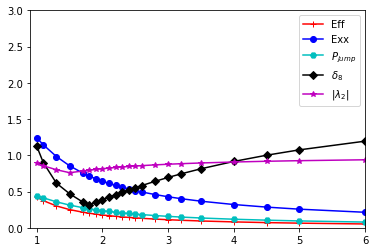

Target:  Gamma
Kernel:  MirrorN_Gamma
sigma: 1.000000 || Eff: 0.490474 || Exx: 1.387030 || Pjump: 0.484631 || Delta8: 1.193622 || EigV2: 0.911729
sigma: 1.100000 || Eff: 0.451711 || Exx: 1.305475 || Pjump: 0.458743 || Delta8: 1.032960 || EigV2: 0.890442
sigma: 1.300000 || Eff: 0.385034 || Exx: 1.162834 || Pjump: 0.412402 || Delta8: 0.780033 || EigV2: 0.850876
sigma: 1.500000 || Eff: 0.332335 || Exx: 1.043984 || Pjump: 0.372849 || Delta8: 0.610010 || EigV2: 0.816422
sigma: 1.700000 || Eff: 0.290829 || Exx: 0.944603 || Pjump: 0.339175 || Delta8: 0.501893 || EigV2: 0.787051
sigma: 1.800000 || Eff: 0.273390 || Exx: 0.901003 || Pjump: 0.324241 || Delta8: 0.464896 || EigV2: 0.774129
sigma: 1.900000 || Eff: 0.257767 || Exx: 0.860906 || Pjump: 0.310423 || Delta8: 0.436613 || EigV2: 0.762312
sigma: 2.000000 || Eff: 0.243715 || Exx: 0.823950 || Pjump: 0.297620 || Delta8: 0.415504 || EigV2: 0.760214
sigma: 2.100000 || Eff: 0.231026 || Exx: 0.789815 || Pjump: 0.285737 || Delta8: 0.400213 || EigV2:

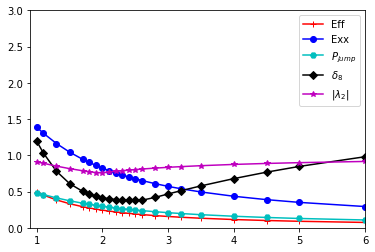

Target:  Uniform
Kernel:  MirrorU_Uniform
sigma: 1.000000 || Eff: 2.050926 || Exx: 2.768314 || Pjump: 0.786590 || Delta8: 1.455589 || EigV2: 0.894390
sigma: 1.100000 || Eff: 1.860536 || Exx: 2.662847 || Pjump: 0.767372 || Delta8: 1.315728 || EigV2: 0.879658
sigma: 1.300000 || Eff: 1.521220 || Exx: 2.463188 || Pjump: 0.729763 || Delta8: 1.079241 || EigV2: 0.848990
sigma: 1.500000 || Eff: 1.254229 || Exx: 2.278190 || Pjump: 0.693611 || Delta8: 0.892246 || EigV2: 0.821925
sigma: 1.700000 || Eff: 1.047770 || Exx: 2.109940 || Pjump: 0.659235 || Delta8: 0.699471 || EigV2: 0.793001
sigma: 1.800000 || Eff: 0.963030 || Exx: 2.031673 || Pjump: 0.642675 || Delta8: 0.605865 || EigV2: 0.778571
sigma: 1.900000 || Eff: 0.887638 || Exx: 1.955932 || Pjump: 0.626450 || Delta8: 0.554934 || EigV2: 0.768715
sigma: 2.000000 || Eff: 0.821841 || Exx: 1.885328 || Pjump: 0.610817 || Delta8: 0.485964 || EigV2: 0.754842
sigma: 2.100000 || Eff: 0.763376 || Exx: 1.817495 || Pjump: 0.595530 || Delta8: 0.427505 || Ei

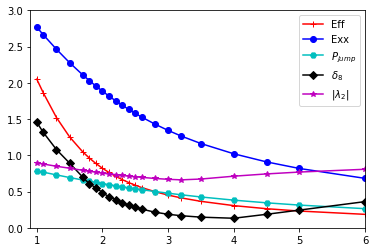

Target:  Uniform
Kernel:  MirrorN_Uniform

sigma: 1.000000 || Eff: 2.252335 || Exx: 2.874827 || Pjump: 0.803515 || Delta8: 1.496603 || EigV2: 0.905320

sigma: 1.100000 || Eff: 2.074407 || Exx: 2.782315 || Pjump: 0.786325 || Delta8: 1.392897 || EigV2: 0.892141
sigma: 1.300000 || Eff: 1.755430 || Exx: 2.607534 || Pjump: 0.752943 || Delta8: 1.185656 || EigV2: 0.866358
sigma: 1.500000 || Eff: 1.495443 || Exx: 2.446498 || Pjump: 0.721026 || Delta8: 0.993385 || EigV2: 0.841825
sigma: 1.700000 || Eff: 1.287902 || Exx: 2.298815 || Pjump: 0.690662 || Delta8: 0.826607 || EigV2: 0.818905
sigma: 1.800000 || Eff: 1.200432 || Exx: 2.229760 || Pjump: 0.676073 || Delta8: 0.753866 || EigV2: 0.808115
sigma: 1.900000 || Eff: 1.122118 || Exx: 2.163750 || Pjump: 0.661880 || Delta8: 0.688122 || EigV2: 0.797789
sigma: 2.000000 || Eff: 1.051833 || Exx: 2.100666 || Pjump: 0.648080 || Delta8: 0.629031 || EigV2: 0.787936
sigma: 2.100000 || Eff: 0.988584 || Exx: 2.040386 || Pjump: 0.634669 || Delta8: 0.576137 || 

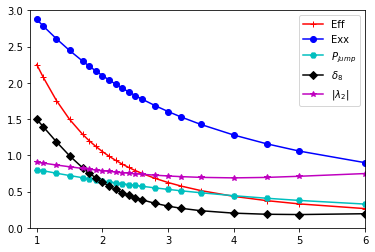

In [4]:
# Target: Uniform + Gamma with Mirror Kernel
sigmaset = [1, 1.1, 1.3, 1.5, 1.7,
                    1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8,
                    3.0, 3.2, 3.5, 4, 4.5, 5, 6]
targetset = ['Gamma', 'Gamma', 'Uniform', 'Uniform']
kernelset = ['MirrorU_Gamma', 'MirrorN_Gamma', 'MirrorU_Uniform', 'MirrorN_Uniform']
for target,kernel in zip(targetset,kernelset):
    a = -np.sqrt(3); b=-a
    effset = []
    Exxset = []
    Pjumpset = []
    Deltaset = []
    Eigset = []
    print('Target: ', target)
    print('Kernel: ', kernel)
    for sigma in sigmaset:
        K = 600
        if (target == 'Gamma'):
            (xL,xU) = (0.05,10)
        elif (target == 'Uniform'):
            (xL,xU) = (-np.sqrt(3),np.sqrt(3))
        else:
            (xL,xU) = (-4.95,5)
    #     K = 1200
    #     (xL,xU) = (-10,10)
        dx = (xU-xL)/K
        x = np.zeros(K)
        pi = x.copy()
        for i in range(K):
            x[i] = xL + dx * (i+0.5)
            pi[i] = logtargetpdf(x[i], target)

        mid = pi[int(K/2)]
        for i in range(K):
            pi[i] = np.exp(pi[i]-mid)
        pi = pi/sum(pi)

        p = np.zeros(K*K).reshape(K,K)
        for i in range(K):
            lnLold = logtargetpdf(x[i], target)
            for j in range(K):
                if(i==j):
                    continue
                p[i,j] = proposal(x[i], x[j], sigma, kernel) * dx

                if ((target=='Gamma')& ('Mirror' not in kernel)):
                    p[i,j] += proposal(x[i],-x[j],sigma,kernel) * dx
                if ('Mirror' not in kernel):
                    proposal_ratio = 1
                elif(target == 'Gamma'):
                    proposal_ratio = x[j]/x[i]
                elif(target == 'Uniform'):
                    proposal_ratio = ((b-x[j])*(x[j]-a)) / ((b-x[i]) * (x[i]-a))

                lna = logtargetpdf(x[j], target) - lnLold + np.log(proposal_ratio)
                if (lna < 0):
                    p[i,j] = p[i,j] * np.exp(lna)
            y = sum(p[i,])
            if (y<1e-8):
                print("Warning: state %d (x = %f) is absoring.\n"%(i+1, x[i]))
            if (y>1.001):
                print("Warning: P[%d,%d] = %f < 0.  Row %d rescaled.\n"%(i+1, i+1, 1-y, i+1));
            elif (y>1):
                y = 1
                print('Sum of row %d > 1' % i)
            p[i,i] = 1-y
    #   Efficiency
        A = np.zeros(K*K).reshape(K,K)
        for i in range(K):
            A[:,i] = pi[i]
        I = np.eye(K)
        Z = np.linalg.inv(I - p + A)
        T = 2*Z - I - A
        f = x.reshape(K,1).copy()
        r = np.dot(T,f)
        B = np.diag(pi)
        fTB = np.dot(f.T,B)
        Eff = np.dot(fTB,r)
        Eff = 1/Eff

    #  Exx
        Exx = 0
        for i in range(K):
            Exx += 2*pi[i]* np.sum(p[i,:i] * np.square(x[:i]-x[i]))

    #  Pjump
        Pjump = np.sum(pi * (1-np.diag(p)))

    #  Delta    
        p8 = np.linalg.matrix_power(p,8)
        Delta = np.max(np.sum(abs(p8 - pi),axis=1))

    #  EigValue
        eigarray = (np.linalg.eig(p)[0]).tolist()
    #             eigarray.sort(reverse=True)
        eigvalue = sorted(eigarray, key=lambda x: x.real,reverse=True)[1].real

        effset.append(np.asscalar(Eff))
        Exxset.append(np.asscalar(Exx))
        Pjumpset.append(np.asscalar(Pjump))
        Deltaset.append(np.asscalar(Delta))
        Eigset.append(eigvalue)
        print('sigma: %f || Eff: %f || Exx: %f || Pjump: %f || Delta8: %f || EigV2: %f'%(sigma,Eff,Exx,Pjump,Delta,eigvalue))

    plt.plot(sigmaset,effset,marker='+',color='red',label='Eff')
    plt.plot(sigmaset,Exxset,marker='o',color='Blue',label='Exx')
    plt.plot(sigmaset,Pjumpset,marker='H',color='c',label='$P_{jump}$')
    plt.plot(sigmaset,Deltaset,marker='D',color='Black',label='$\delta_8$')
    plt.plot(sigmaset,Eigset,marker='*',color='m',label='|$\lambda_2$|')
    plt.ylim(0, 3)
    plt.xlim(0.9, 6)
    plt.legend()
    filename = 'McmcFiugre/Target_' + target + ' Kernel_'+ kernel+'.eps'
    plt.savefig(filename, format='eps', dpi=1000)
    plt.show()

Target:  Uniform
Kernel:  Gaussian
sigma: 0.100000 || Eff: 0.002544 || Exx: 0.009676 || Pjump: 0.976134 || Delta8: 1.585832 || EigV2: 0.994930
sigma: 0.300000 || Eff: 0.019240 || Exx: 0.081557 || Pjump: 0.991489 || Delta8: 0.996586 || EigV2: 0.962687
sigma: 0.500000 || Eff: 0.052512 || Exx: 0.211183 || Pjump: 0.994560 || Delta8: 0.559313 || EigV2: 0.901395
sigma: 0.700000 || Eff: 0.102139 || Exx: 0.383558 || Pjump: 0.995876 || Delta8: 0.254125 || EigV2: 0.816713
sigma: 0.900000 || Eff: 0.167401 || Exx: 0.583819 || Pjump: 0.996607 || Delta8: 0.090329 || EigV2: 0.716071
sigma: 1.000000 || Eff: 0.205461 || Exx: 0.689966 || Pjump: 0.996863 || Delta8: 0.049793 || EigV2: 0.662289
sigma: 1.100000 || Eff: 0.247478 || Exx: 0.797527 || Pjump: 0.997085 || Delta8: 0.028528 || EigV2: 0.606634
sigma: 1.300000 || Eff: 0.340440 || Exx: 1.015423 || Pjump: 0.997395 || Delta8: 0.025926 || EigV2: 0.495745
sigma: 1.500000 || Eff: 0.440041 || Exx: 1.217540 || Pjump: 0.997644 || Delta8: 0.034034 || EigV2: 0.

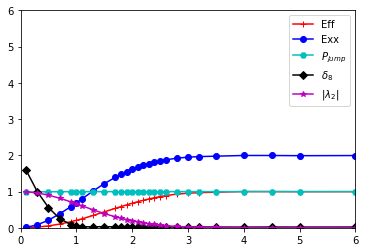

Target:  Uniform
Kernel:  Uniform
sigma: 0.100000 || Eff: 0.003265 || Exx: 0.009738 || Pjump: 0.982500 || Delta8: 1.555208 || EigV2: 0.993683
sigma: 0.300000 || Eff: 0.020129 || Exx: 0.083104 || Pjump: 0.993611 || Delta8: 0.984408 || EigV2: 0.961084
sigma: 0.500000 || Eff: 0.054293 || Exx: 0.218336 || Pjump: 0.995833 || Delta8: 0.545276 || EigV2: 0.898303
sigma: 0.700000 || Eff: 0.107125 || Exx: 0.403435 || Pjump: 0.996786 || Delta8: 0.235024 || EigV2: 0.808749
sigma: 0.900000 || Eff: 0.180392 || Exx: 0.626401 || Pjump: 0.997315 || Delta8: 0.072459 || EigV2: 0.697576
sigma: 1.000000 || Eff: 0.225319 || Exx: 0.748333 || Pjump: 0.997500 || Delta8: 0.034961 || EigV2: 0.635823
sigma: 1.100000 || Eff: 0.276108 || Exx: 0.875233 || Pjump: 0.997652 || Delta8: 0.015941 || EigV2: 0.571100
sigma: 1.300000 || Eff: 0.395986 || Exx: 1.137932 || Pjump: 0.997885 || Delta8: 0.011388 || EigV2: 0.436354
sigma: 1.500000 || Eff: 0.540655 || Exx: 1.402497 || Pjump: 0.998056 || Delta8: 0.011118 || EigV2: 0.3

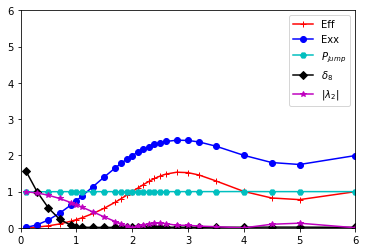

Target:  Uniform
Kernel:  Bactrian
sigma: 0.100000 || Eff: 0.002545 || Exx: 0.009765 || Pjump: 0.998446 || Delta8: 1.590224 || EigV2: 0.994930
sigma: 0.300000 || Eff: 0.019435 || Exx: 0.083950 || Pjump: 0.998926 || Delta8: 0.993700 || EigV2: 0.962324
sigma: 0.500000 || Eff: 0.054065 || Exx: 0.222272 || Pjump: 0.999022 || Delta8: 0.543674 || EigV2: 0.898678
sigma: 0.700000 || Eff: 0.108383 || Exx: 0.414242 || Pjump: 0.999064 || Delta8: 0.234792 || EigV2: 0.806779
sigma: 0.900000 || Eff: 0.185425 || Exx: 0.649364 || Pjump: 0.999087 || Delta8: 0.066881 || EigV2: 0.690680
sigma: 1.000000 || Eff: 0.233767 || Exx: 0.779742 || Pjump: 0.999095 || Delta8: 0.031339 || EigV2: 0.625109
sigma: 1.100000 || Eff: 0.290439 || Exx: 0.912462 || Pjump: 0.999104 || Delta8: 0.033742 || EigV2: 0.554375
sigma: 1.300000 || Eff: 0.428345 || Exx: 1.209565 || Pjump: 0.999111 || Delta8: 0.015312 || EigV2: 0.405092
sigma: 1.500000 || Eff: 0.606813 || Exx: 1.512079 || Pjump: 0.999120 || Delta8: 0.022504 || EigV2: 0.

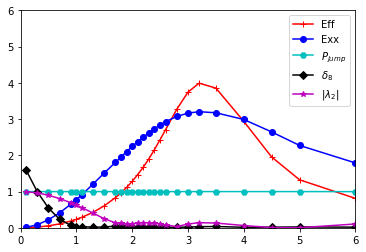

Target:  Uniform
Kernel:  Box
sigma: 0.100000 || Eff: 0.005471 || Exx: 0.009498 || Pjump: 0.999172 || Delta8: 1.544100 || EigV2: 0.989229
sigma: 0.300000 || Eff: 0.018915 || Exx: 0.084248 || Pjump: 0.999184 || Delta8: 0.998065 || EigV2: 0.963356
sigma: 0.500000 || Eff: 0.057092 || Exx: 0.221753 || Pjump: 0.999172 || Delta8: 0.524334 || EigV2: 0.893346
sigma: 0.700000 || Eff: 0.107552 || Exx: 0.418688 || Pjump: 0.999157 || Delta8: 0.243279 || EigV2: 0.808177
sigma: 0.900000 || Eff: 0.185482 || Exx: 0.652984 || Pjump: 0.999172 || Delta8: 0.073904 || EigV2: 0.690685
sigma: 1.000000 || Eff: 0.235688 || Exx: 0.786976 || Pjump: 0.999162 || Delta8: 0.049655 || EigV2: 0.622710
sigma: 1.100000 || Eff: 0.293949 || Exx: 0.928453 || Pjump: 0.999172 || Delta8: 0.062745 || EigV2: 0.550295
sigma: 1.300000 || Eff: 0.437389 || Exx: 1.218430 || Pjump: 0.999164 || Delta8: 0.047251 || EigV2: 0.396461
sigma: 1.500000 || Eff: 0.622827 || Exx: 1.533309 || Pjump: 0.999165 || Delta8: 0.045787 || EigV2: 0.23682

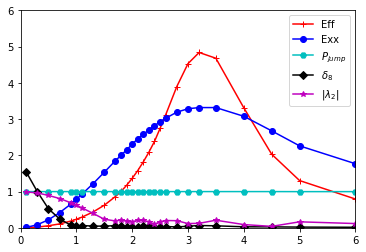

Target:  Uniform
Kernel:  Airplane
sigma: 0.100000 || Eff: 0.001157 || Exx: 0.009861 || Pjump: 0.999139 || Delta8: 1.603593 || EigV2: 0.997717
sigma: 0.300000 || Eff: 0.017953 || Exx: 0.084787 || Pjump: 0.999173 || Delta8: 1.006604 || EigV2: 0.965184
sigma: 0.500000 || Eff: 0.052859 || Exx: 0.224350 || Pjump: 0.999160 || Delta8: 0.552938 || EigV2: 0.900867
sigma: 0.700000 || Eff: 0.107629 || Exx: 0.417886 || Pjump: 0.999168 || Delta8: 0.233613 || EigV2: 0.808036
sigma: 0.900000 || Eff: 0.185346 || Exx: 0.654630 || Pjump: 0.999162 || Delta8: 0.066064 || EigV2: 0.690824
sigma: 1.000000 || Eff: 0.234659 || Exx: 0.781293 || Pjump: 0.999170 || Delta8: 0.031581 || EigV2: 0.623953
sigma: 1.100000 || Eff: 0.290459 || Exx: 0.923939 || Pjump: 0.999167 || Delta8: 0.016062 || EigV2: 0.554298
sigma: 1.300000 || Eff: 0.430959 || Exx: 1.204492 || Pjump: 0.999170 || Delta8: 0.041250 || EigV2: 0.402375
sigma: 1.500000 || Eff: 0.609063 || Exx: 1.505767 || Pjump: 0.999166 || Delta8: 0.047402 || EigV2: 0.

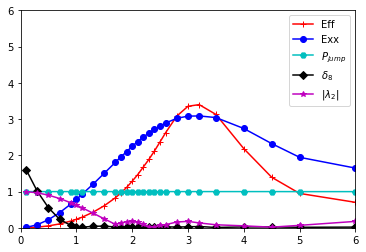

Target:  Uniform
Kernel:  StrawHat
sigma: 0.100000 || Eff: -0.002729 || Exx: 0.009990 || Pjump: 0.999123 || Delta8: 1.663644 || EigV2: 1.005386
sigma: 0.300000 || Eff: 0.014201 || Exx: 0.086132 || Pjump: 0.999170 || Delta8: 1.061967 || EigV2: 0.972367
sigma: 0.500000 || Eff: 0.057215 || Exx: 0.221789 || Pjump: 0.999180 || Delta8: 0.527610 || EigV2: 0.893130
sigma: 0.700000 || Eff: 0.109901 || Exx: 0.417906 || Pjump: 0.999163 || Delta8: 0.239476 || EigV2: 0.804396
sigma: 0.900000 || Eff: 0.187518 || Exx: 0.659966 || Pjump: 0.999170 || Delta8: 0.087180 || EigV2: 0.687820
sigma: 1.000000 || Eff: 0.238141 || Exx: 0.789261 || Pjump: 0.999165 || Delta8: 0.072348 || EigV2: 0.619522
sigma: 1.100000 || Eff: 0.294801 || Exx: 0.937549 || Pjump: 0.999162 || Delta8: 0.095373 || EigV2: 0.549256
sigma: 1.300000 || Eff: 0.441749 || Exx: 1.227247 || Pjump: 0.999167 || Delta8: 0.047369 || EigV2: 0.392108
sigma: 1.500000 || Eff: 0.632670 || Exx: 1.543453 || Pjump: 0.999170 || Delta8: 0.070928 || EigV2: 0

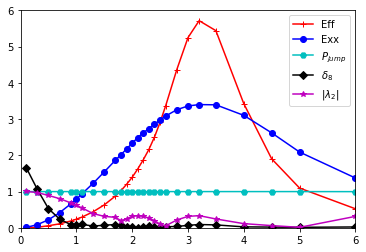

Target:  Gamma
Kernel:  Gaussian
sigma: 0.100000 || Eff: 0.001862 || Exx: 0.009287 || Pjump: 0.897889 || Delta8: 1.999943 || EigV2: 0.997052
sigma: 0.300000 || Eff: 0.014476 || Exx: 0.071089 || Pjump: 0.872246 || Delta8: 1.998493 || EigV2: 0.978206
sigma: 0.500000 || Eff: 0.034737 || Exx: 0.165547 || Pjump: 0.816074 || Delta8: 1.988225 || EigV2: 0.949988
sigma: 0.700000 || Eff: 0.058919 || Exx: 0.269783 || Pjump: 0.762450 || Delta8: 1.953246 || EigV2: 0.918380
sigma: 0.900000 || Eff: 0.084444 || Exx: 0.370360 || Pjump: 0.716107 || Delta8: 1.878690 || EigV2: 0.886692
sigma: 1.000000 || Eff: 0.097132 || Exx: 0.417356 || Pjump: 0.696036 || Delta8: 1.825098 || EigV2: 0.871398
sigma: 1.100000 || Eff: 0.109557 || Exx: 0.461828 || Pjump: 0.677973 || Delta8: 1.761618 || EigV2: 0.856647
sigma: 1.300000 || Eff: 0.133229 || Exx: 0.543087 || Pjump: 0.647204 || Delta8: 1.611932 || EigV2: 0.829037
sigma: 1.500000 || Eff: 0.154949 || Exx: 0.614200 || Pjump: 0.622120 || Delta8: 1.446264 || EigV2: 0.80

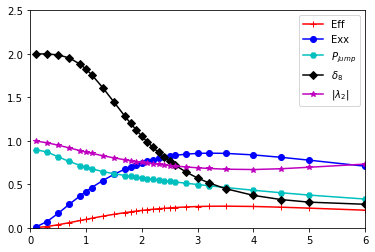

Target:  Gamma
Kernel:  Uniform
sigma: 0.100000 || Eff: 0.001942 || Exx: 0.009688 || Pjump: 0.922766 || Delta8: 1.999957 || EigV2: 0.996913
sigma: 0.300000 || Eff: 0.015579 || Exx: 0.076606 || Pjump: 0.876832 || Delta8: 1.998862 || EigV2: 0.976413
sigma: 0.500000 || Eff: 0.036515 || Exx: 0.175141 || Pjump: 0.797164 || Delta8: 1.991010 || EigV2: 0.947178
sigma: 0.700000 || Eff: 0.064669 || Exx: 0.298815 || Pjump: 0.738222 || Delta8: 1.957966 || EigV2: 0.910633
sigma: 0.900000 || Eff: 0.095902 || Exx: 0.422808 || Pjump: 0.684669 || Delta8: 1.877093 || EigV2: 0.872995
sigma: 1.000000 || Eff: 0.110574 || Exx: 0.476050 || Pjump: 0.658939 || Delta8: 1.820030 || EigV2: 0.856151
sigma: 1.100000 || Eff: 0.127789 || Exx: 0.535456 || Pjump: 0.639722 || Delta8: 1.738727 || EigV2: 0.836772
sigma: 1.300000 || Eff: 0.157852 || Exx: 0.631533 || Pjump: 0.604367 || Delta8: 1.554146 || EigV2: 0.803357
sigma: 1.500000 || Eff: 0.181673 || Exx: 0.703369 || Pjump: 0.575896 || Delta8: 1.364539 || EigV2: 0.776

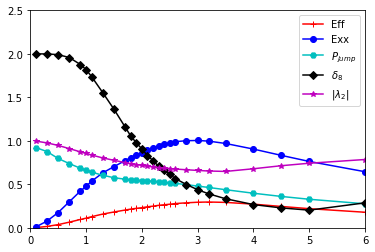

Target:  Gamma
Kernel:  Bactrian
sigma: 0.100000 || Eff: 0.001903 || Exx: 0.009492 || Pjump: 0.955376 || Delta8: 1.999965 || EigV2: 0.996967
sigma: 0.300000 || Eff: 0.015524 || Exx: 0.076374 || Pjump: 0.872646 || Delta8: 1.999120 || EigV2: 0.976347
sigma: 0.500000 || Eff: 0.039176 || Exx: 0.187807 || Pjump: 0.792223 || Delta8: 1.991588 || EigV2: 0.943099
sigma: 0.700000 || Eff: 0.069810 || Exx: 0.322926 || Pjump: 0.717624 || Delta8: 1.958363 || EigV2: 0.903333
sigma: 0.900000 || Eff: 0.104960 || Exx: 0.464641 || Pjump: 0.651053 || Delta8: 1.871222 || EigV2: 0.861239
sigma: 1.000000 || Eff: 0.123616 || Exx: 0.533864 || Pjump: 0.621257 || Delta8: 1.801378 || EigV2: 0.840219
sigma: 1.100000 || Eff: 0.142676 || Exx: 0.600400 || Pjump: 0.593948 || Delta8: 1.714102 || EigV2: 0.819553
sigma: 1.300000 || Eff: 0.180840 || Exx: 0.722373 || Pjump: 0.547029 || Delta8: 1.497343 || EigV2: 0.780003
sigma: 1.500000 || Eff: 0.216989 || Exx: 0.827150 || Pjump: 0.510396 || Delta8: 1.252612 || EigV2: 0.74

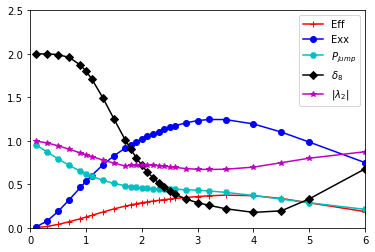

Target:  Gamma
Kernel:  Box








































Sum of row 489 > 1
Sum of row 491 > 1
Sum of row 502 > 1
Sum of row 504 > 1
Sum of row 506 > 1
Sum of row 517 > 1
Sum of row 519 > 1
Sum of row 521 > 1
sigma: 0.100000 || Eff: 0.001835 || Exx: 0.009245 || Pjump: 0.957841 || Delta8: 2.000804 || EigV2: 0.997095




sigma: 0.300000 || Eff: 0.015155 || Exx: 0.074676 || Pjump: 0.852928 || Delta8: 1.999227 || EigV2: 0.976817






sigma: 0.500000 || Eff: 0.038728 || Exx: 0.185824 || Pjump: 0.792791 || Delta8: 1.992352 || EigV2: 0.943619












sigma: 0.700000 || Eff: 0.072494 || Exx: 0.334940 || Pjump: 0.723400 || Delta8: 1.956431 || EigV2: 0.899959













sigma: 0.900000 || Eff: 0.108056 || Exx: 0.477562 || Pjump: 0.645739 || Delta8: 1.865874 || EigV2: 0.857307










sigma: 1.000000 || Eff: 0.125200 || Exx: 0.541447 || Pjump: 0.616431 || Delta8: 1.801259 || EigV2: 0.838214














sigma: 1.100000 || Eff: 0.146267 || Exx: 0.615760 || Pjump: 0.587472 || D

sigma: 1.700000 || Eff: 0.254438 || Exx: 0.933386 || Pjump: 0.470974 || Delta8: 0.992568 || EigV2: 0.743914
Sum of row 0 > 1
Sum of row 1 > 1
Sum of row 2 > 1

Sum of row 4 > 1

Sum of row 7 > 1
Sum of row 8 > 1

Sum of row 11 > 1


Sum of row 14 > 1

Sum of row 18 > 1
Sum of row 19 > 1

Sum of row 22 > 1
Sum of row 23 > 1
Sum of row 24 > 1
sigma: 1.800000 || Eff: 0.270161 || Exx: 0.976150 || Pjump: 0.460853 || Delta8: 0.869831 || EigV2: 0.752357































sigma: 1.900000 || Eff: 0.285405 || Exx: 1.018332 || Pjump: 0.456846 || Delta8: 0.757761 || EigV2: 0.753467






















sigma: 2.000000 || Eff: 0.294261 || Exx: 1.043961 || Pjump: 0.448486 || Delta8: 0.682235 || EigV2: 0.757801



























sigma: 2.100000 || Eff: 0.305660 || Exx: 1.078169 || Pjump: 0.444963 || Delta8: 0.601459 || EigV2: 0.756594












sigma: 2.200000 || Eff: 0.312888 || Exx: 1.101865 || Pjump: 0.441138 || Delta8: 0.546160 || EigV2: 0.755831



























sigma: 2.500000 || Eff: 0.341213 || Exx: 1.189398 || Pjump: 0.439782 || Delta8: 0.395659 || EigV2: 0.746564




















sigma: 2.600000 || Eff: 0.350612 || Exx: 1.216384 || Pjump: 0.438469 || Delta8: 0.360412 || EigV2: 0.742844



















Sum of row 19 > 1
sigma: 2.800000 || Eff: 0.366652 || Exx: 1.257325 || Pjump: 0.434768 || Delta8: 0.306454 || EigV2: 0.733440





Sum of row 5 > 1







Sum of row 13 > 1



sigma: 3.000000 || Eff: 0.378945 || Exx: 1.281857 || Pjump: 0.426765 || Delta8: 0.269016 || EigV2: 0.724390

sigma: 3.200000 || Eff: 0.387392 || Exx: 1.291814 || Pjump: 0.416372 || Delta8: 0.240444 || EigV2: 0.714847












sigma: 3.500000 || Eff: 0.393568 || Exx: 1.287117 || Pjump: 0.399110 || Delta8: 0.195310 || EigV2: 0.699494








Sum of row 8 > 1
sigma: 4.000000 || Eff: 0.374398 || Exx: 1.221444 || Pjump: 0.362564 || Delta8: 0.157595 || EigV2: 0.699991






sigma: 4.500000 || Eff: 0.332376 || Exx: 1.117328 || Pjump: 0.322940 || Delta8: 0.181467 || E

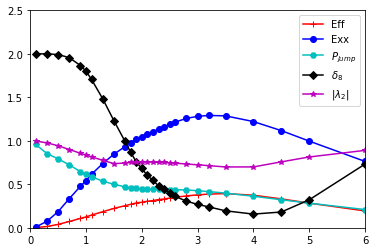

Target:  Gamma
Kernel:  Airplane
sigma: 0.100000 || Eff: 0.001696 || Exx: 0.008462 || Pjump: 0.906336 || Delta8: 1.999969 || EigV2: 0.997295
Sum of row 0 > 1
sigma: 0.300000 || Eff: 0.015659 || Exx: 0.077035 || Pjump: 0.876280 || Delta8: 1.999116 || EigV2: 0.976160



sigma: 0.500000 || Eff: 0.040376 || Exx: 0.193357 || Pjump: 0.803973 || Delta8: 1.990961 || EigV2: 0.941507
sigma: 0.700000 || Eff: 0.068994 || Exx: 0.319502 || Pjump: 0.717303 || Delta8: 1.959247 || EigV2: 0.904481


sigma: 0.900000 || Eff: 0.105172 || Exx: 0.465316 || Pjump: 0.656379 || Delta8: 1.869368 || EigV2: 0.861175




sigma: 1.000000 || Eff: 0.124385 || Exx: 0.536235 || Pjump: 0.628492 || Delta8: 1.796539 || EigV2: 0.839578





Sum of row 5 > 1
sigma: 1.100000 || Eff: 0.143968 || Exx: 0.604030 || Pjump: 0.602754 || Delta8: 1.705054 || EigV2: 0.818392
sigma: 1.300000 || Eff: 0.178240 || Exx: 0.712296 || Pjump: 0.553146 || Delta8: 1.504945 || EigV2: 0.782688



Sum of row 3 > 1
sigma: 1.500000 || Eff: 0.214120 ||

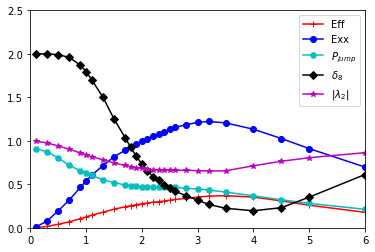

Target:  Gamma
Kernel:  StrawHat
































































































































































































































































sigma: 0.100000 || Eff: 0.002273 || Exx: 0.011334 || Pjump: 1.054739 || Delta8: 1.999967 || EigV2: 0.996379




sigma: 0.300000 || Eff: 0.016175 || Exx: 0.079546 || Pjump: 0.884951 || Delta8: 1.999209 || EigV2: 0.975344
Sum of row 0 > 1
sigma: 0.500000 || Eff: 0.039868 || Exx: 0.191192 || Pjump: 0.788696 || Delta8: 1.992086 || EigV2: 0.942053
sigma: 0.700000 || Eff: 0.070525 || Exx: 0.326826 || Pjump: 0.707645 || Delta8: 1.960093 || EigV2: 0.902281
sigma: 0.900000 || Eff: 0.105762 || Exx: 0.470004 || Pjump: 0.637409 || Delta8: 1.874887 || EigV2: 0.860102












sigma: 1.000000 || Eff: 0.129471 || Exx: 0.560057 || Pjump: 0.618107 || Delta8: 1.795063 || EigV2: 0.834542











Sum of row 11 > 1
sigma: 1.100000 || Eff: 0.149381 || Exx: 0.628208 || Pjump: 0.588136 || Delta8: 1.695328 || EigV2: 0.812107









Sum of row 9 > 1
sigma: 1.300000 || Eff: 0.188237 || Exx: 0.751776 || Pjump: 0.536825 || Delta8: 1.469255 || EigV2: 0.772362
Sum of row 0 > 1
Sum of row 1 > 1
sigma: 1.50000

sigma: 3.000000 || Eff: 0.357637 || Exx: 1.287022 || Pjump: 0.442818 || Delta8: 0.312726 || EigV2: 0.723974
















sigma: 3.200000 || Eff: 0.371648 || Exx: 1.304053 || Pjump: 0.433773 || Delta8: 0.280976 || EigV2: 0.720732
Sum of row 0 > 1
Sum of row 1 > 1
Sum of row 2 > 1
sigma: 3.500000 || Eff: 0.387955 || Exx: 1.301493 || Pjump: 0.413714 || Delta8: 0.203768 || EigV2: 0.716603










sigma: 4.000000 || Eff: 0.386888 || Exx: 1.236370 || Pjump: 0.370469 || Delta8: 0.197667 || EigV2: 0.718975
Sum of row 0 > 1
Sum of row 1 > 1
Sum of row 2 > 1
sigma: 4.500000 || Eff: 0.335780 || Exx: 1.110834 || Pjump: 0.320478 || Delta8: 0.262371 || EigV2: 0.776722





sigma: 5.000000 || Eff: 0.265944 || Exx: 0.967656 || Pjump: 0.272764 || Delta8: 0.443655 || EigV2: 0.829491


sigma: 6.000000 || Eff: 0.154264 || Exx: 0.694845 || Pjump: 0.192059 || Delta8: 0.835400 || EigV2: 0.897696

sigma: 7.000000 || Eff: 0.093767 || Exx: 0.488084 || Pjump: 0.134410 || Delta8: 1.157876 || EigV2: 0.934987


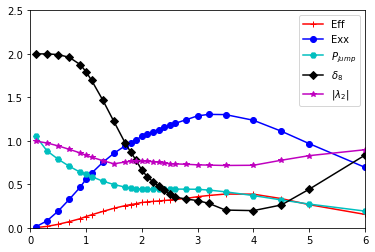

In [3]:
# Target: Uniform + Gamma without Mirror Kernel
sigmaset = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5, 1.7,
                    1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8,
                    3.0, 3.2, 3.5, 4, 4.5, 5, 6, 7, 8]
kernelset = ['Gaussian', 'Uniform', 'Bactrian', 'Box', 'Airplane', 'StrawHat']
targetset = ['Uniform','Gamma']
for target in targetset:
    ylim = 6 if target == 'Uniform' else 2.5
    for kernel in kernelset:
        effset = []
        Exxset = []
        Pjumpset = []
        Deltaset = []
        Eigset = []
        print('Target: ', target)
        print('Kernel: ', kernel)
        for sigma in sigmaset:
            K = 600
            if (target == 'Gamma'):
                (xL,xU) = (0,10)
            elif (target == 'Uniform'):
                (xL,xU) = (-np.sqrt(3),np.sqrt(3))
            else:
                (xL,xU) = (-4.95,5)
        #     K = 1200
        #     (xL,xU) = (-10,10)
            dx = (xU-xL)/K
            x = np.zeros(K)
            pi = x.copy()
            for i in range(K):
                x[i] = xL + dx * (i+0.5)
                pi[i] = logtargetpdf(x[i], target)

            mid = pi[int(K/2)]
            for i in range(K):
                pi[i] = np.exp(pi[i]-mid)
            pi = pi/sum(pi)

            p = np.zeros(K*K).reshape(K,K)
            if (target == 'Uniform'):
                p = uniform_target()
            else:
                for i in range(K):
                    lnLold = logtargetpdf(x[i], target)
                    for j in range(K):
                        if(i==j):
                            continue
                        p[i,j] = proposal(x[i], x[j], sigma, kernel) * dx

                        if ((target=='Gamma')& ('Mirror' not in kernel)):
                            p[i,j] += proposal(x[i],-x[j],sigma,kernel) * dx
                        if ('Mirror' not in kernel):
                            proposal_ratio = 1
                        elif(target == 'Gamma'):
                            proposal_ratio = x[j]/x[i]
                        elif(target == 'Uniform'):
                            proposal_ratio = ((b-x[j])*(x[j]-a)) / ((b-x[i]) * (x[i]-a))    

                        lna = logtargetpdf(x[j], target) - lnLold + np.log(proposal_ratio)
                        if (lna < 0):
                            p[i,j] = p[i,j] * np.exp(lna)
                    y = sum(p[i,])
                    if (y<1e-8):
                        print("Warning: state %d (x = %f) is absoring.\n"%(i+1, x[i]))
                    if (y>1.001):
                        print("Warning: P[%d,%d] = %f < 0.  Row %d rescaled.\n"%(i+1, i+1, 1-y, i+1));
                    elif (y>1):
                        y = 1
                        print('Sum of row %d > 1' % i)
                    p[i,i] = 1-y
        #   Efficiency
            A = np.zeros(K*K).reshape(K,K)
            for i in range(K):
                A[:,i] = pi[i]
            I = np.eye(K)
            Z = np.linalg.inv(I - p + A)
            T = 2*Z - I - A
            f = x.reshape(K,1).copy()
            r = np.dot(T,f)
            B = np.diag(pi)
            fTB = np.dot(f.T,B)
            Eff = np.dot(fTB,r)
            Eff = 1/Eff

        #  Exx
            Exx = 0
            for i in range(K):
                Exx += 2*pi[i]* np.sum(p[i,:i] * np.square(x[:i]-x[i]))

        #  Pjump
            Pjump = np.sum(pi * (1-np.diag(p)))

        #  Delta    
            p8 = np.linalg.matrix_power(p,8)
            Delta = np.max(np.sum(abs(p8 - pi),axis=1))

        #  EigValue
            eigarray = (np.linalg.eig(p)[0]).tolist()
#             eigarray.sort(reverse=True)
            eigvalue = sorted(eigarray, key=lambda x: x.real,reverse=True)[1].real

            effset.append(np.asscalar(Eff))
            Exxset.append(np.asscalar(Exx))
            Pjumpset.append(np.asscalar(Pjump))
            Deltaset.append(np.asscalar(Delta))
            Eigset.append(eigvalue)
            print('sigma: %f || Eff: %f || Exx: %f || Pjump: %f || Delta8: %f || EigV2: %f'%(sigma,Eff,Exx,Pjump,Delta,eigvalue))

        plt.plot(sigmaset,effset,marker='+',color='red',label='Eff')
        plt.plot(sigmaset,Exxset,marker='o',color='Blue',label='Exx')
        plt.plot(sigmaset,Pjumpset,marker='H',color='c',label='$P_{jump}$')
        plt.plot(sigmaset,Deltaset,marker='D',color='Black',label='$\delta_8$')
        plt.plot(sigmaset,Eigset,marker='*',color='m',label='|$\lambda_2$|')
        plt.ylim(0, ylim)
        plt.xlim(0, 6)
        plt.legend()
        filename = 'McmcFiugre/Target_' + target + ' Kernel_'+ kernel+'.eps'
        plt.savefig(filename, format='eps', dpi=1000)
        plt.show()

Target:  N01
Kernel:  Gaussian
sigma: 0.100000 || Eff: 0.002342 || Exx: 0.009364 || Pjump: 0.902111 || Delta8: 1.999823 || EigV2: 0.995332
sigma: 0.300000 || Eff: 0.018333 || Exx: 0.073064 || Pjump: 0.883186 || Delta8: 1.980903 || EigV2: 0.964315
sigma: 0.500000 || Eff: 0.043966 || Exx: 0.173563 || Pjump: 0.830825 || Delta8: 1.866529 || EigV2: 0.917655
sigma: 0.700000 || Eff: 0.074137 || Exx: 0.287712 || Pjump: 0.776226 || Delta8: 1.636355 || EigV2: 0.867264
sigma: 0.900000 || Eff: 0.105306 || Exx: 0.398980 || Pjump: 0.723461 || Delta8: 1.352514 || EigV2: 0.819764
sigma: 1.000000 || Eff: 0.120483 || Exx: 0.450187 || Pjump: 0.698225 || Delta8: 1.211775 || EigV2: 0.798061
sigma: 1.100000 || Eff: 0.135073 || Exx: 0.497382 || Pjump: 0.673874 || Delta8: 1.079576 || EigV2: 0.777915
sigma: 1.300000 || Eff: 0.161764 || Exx: 0.578270 || Pjump: 0.627986 || Delta8: 0.851457 || EigV2: 0.742336
sigma: 1.500000 || Eff: 0.184235 || Exx: 0.640707 || Pjump: 0.585930 || Delta8: 0.674756 || EigV2: 0.7126

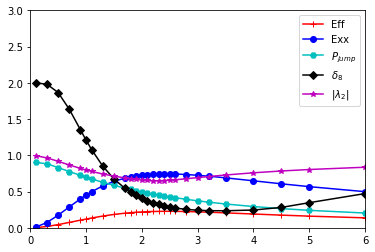

Target:  N01
Kernel:  Uniform
sigma: 0.100000 || Eff: 0.002405 || Exx: 0.009611 || Pjump: 0.922623 || Delta8: 1.999888 || EigV2: 0.995205
sigma: 0.300000 || Eff: 0.019466 || Exx: 0.077241 || Pjump: 0.885220 || Delta8: 1.983429 || EigV2: 0.962066
sigma: 0.500000 || Eff: 0.048292 || Exx: 0.189190 || Pjump: 0.823872 || Delta8: 1.859886 || EigV2: 0.909563
sigma: 0.700000 || Eff: 0.084060 || Exx: 0.323469 || Pjump: 0.761355 || Delta8: 1.586809 || EigV2: 0.850381
sigma: 0.900000 || Eff: 0.122777 || Exx: 0.461691 || Pjump: 0.700888 || Delta8: 1.245672 || EigV2: 0.793442
sigma: 1.000000 || Eff: 0.140558 || Exx: 0.522153 || Pjump: 0.670006 || Delta8: 1.094003 || EigV2: 0.769753
sigma: 1.100000 || Eff: 0.157971 || Exx: 0.579051 || Pjump: 0.640783 || Delta8: 0.954834 || EigV2: 0.747946
sigma: 1.300000 || Eff: 0.194184 || Exx: 0.688702 || Pjump: 0.588693 || Delta8: 0.700753 || EigV2: 0.706244
sigma: 1.500000 || Eff: 0.226104 || Exx: 0.774013 || Pjump: 0.540580 || Delta8: 0.516262 || EigV2: 0.67275

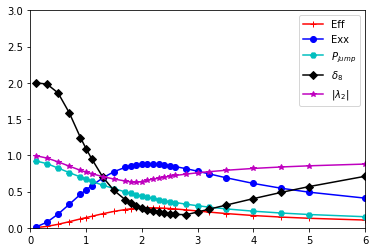

Target:  N01
Kernel:  Bactrian
sigma: 0.100000 || Eff: 0.002390 || Exx: 0.009547 || Pjump: 0.960043 || Delta8: 1.999917 || EigV2: 0.995234
sigma: 0.300000 || Eff: 0.019669 || Exx: 0.077842 || Pjump: 0.886095 || Delta8: 1.985510 || EigV2: 0.961614
sigma: 0.500000 || Eff: 0.049921 || Exx: 0.194279 || Pjump: 0.812374 || Delta8: 1.857839 || EigV2: 0.906245
sigma: 0.700000 || Eff: 0.089188 || Exx: 0.339370 || Pjump: 0.740646 || Delta8: 1.549478 || EigV2: 0.840732
sigma: 0.900000 || Eff: 0.133948 || Exx: 0.496050 || Pjump: 0.671744 || Delta8: 1.154130 || EigV2: 0.774306
sigma: 1.000000 || Eff: 0.157403 || Exx: 0.574216 || Pjump: 0.638558 || Delta8: 0.964328 || EigV2: 0.742812
sigma: 1.100000 || Eff: 0.181108 || Exx: 0.650268 || Pjump: 0.606304 || Delta8: 0.794838 || EigV2: 0.713192
sigma: 1.300000 || Eff: 0.228049 || Exx: 0.791291 || Pjump: 0.544808 || Delta8: 0.529610 || EigV2: 0.660799
sigma: 1.500000 || Eff: 0.272553 || Exx: 0.911706 || Pjump: 0.487593 || Delta8: 0.352423 || EigV2: 0.6186

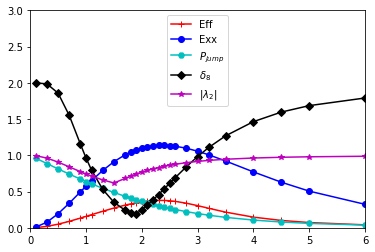

Target:  N01
Kernel:  Box
sigma: 0.100000 || Eff: 0.002230 || Exx: 0.008909 || Pjump: 0.856203 || Delta8: 1.999935 || EigV2: 0.995553
sigma: 0.300000 || Eff: 0.018820 || Exx: 0.074506 || Pjump: 0.841376 || Delta8: 1.987493 || EigV2: 0.963229
sigma: 0.500000 || Eff: 0.051641 || Exx: 0.200593 || Pjump: 0.806031 || Delta8: 1.849221 || EigV2: 0.903152
sigma: 0.700000 || Eff: 0.090937 || Exx: 0.345350 || Pjump: 0.730201 || Delta8: 1.536044 || EigV2: 0.837782
sigma: 0.900000 || Eff: 0.135749 || Exx: 0.501923 || Pjump: 0.659356 || Delta8: 1.140312 || EigV2: 0.771460
sigma: 1.000000 || Eff: 0.161991 || Exx: 0.588985 || Pjump: 0.629796 || Delta8: 0.929718 || EigV2: 0.736293
sigma: 1.100000 || Eff: 0.183102 || Exx: 0.656873 || Pjump: 0.592846 || Delta8: 0.783160 || EigV2: 0.710313
sigma: 1.300000 || Eff: 0.236369 || Exx: 0.816358 || Pjump: 0.535506 || Delta8: 0.491020 || EigV2: 0.651135
sigma: 1.500000 || Eff: 0.281609 || Exx: 0.938184 || Pjump: 0.476309 || Delta8: 0.326550 || EigV2: 0.657485
si

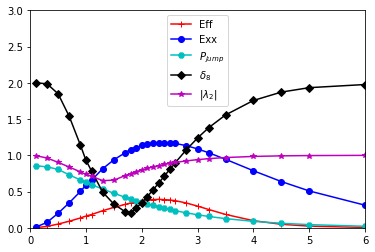

Target:  N01
Kernel:  Airplane
sigma: 0.100000 || Eff: 0.002094 || Exx: 0.008368 || Pjump: 0.903282 || Delta8: 1.999936 || EigV2: 0.995822
sigma: 0.300000 || Eff: 0.019529 || Exx: 0.077309 || Pjump: 0.883264 || Delta8: 1.985762 || EigV2: 0.961888
sigma: 0.500000 || Eff: 0.050664 || Exx: 0.197192 || Pjump: 0.818730 || Delta8: 1.853636 || EigV2: 0.904978
sigma: 0.700000 || Eff: 0.091176 || Exx: 0.346871 || Pjump: 0.749929 || Delta8: 1.533694 || EigV2: 0.837751
sigma: 0.900000 || Eff: 0.132092 || Exx: 0.490845 || Pjump: 0.672391 || Delta8: 1.173450 || EigV2: 0.777534
sigma: 1.000000 || Eff: 0.155824 || Exx: 0.570425 || Pjump: 0.641156 || Delta8: 0.981313 || EigV2: 0.745774
sigma: 1.100000 || Eff: 0.179761 || Exx: 0.647629 || Pjump: 0.610395 || Delta8: 0.809041 || EigV2: 0.716055
sigma: 1.300000 || Eff: 0.226943 || Exx: 0.789694 || Pjump: 0.551010 || Delta8: 0.536199 || EigV2: 0.663939
sigma: 1.500000 || Eff: 0.265522 || Exx: 0.893939 || Pjump: 0.492165 || Delta8: 0.380441 || EigV2: 0.6280

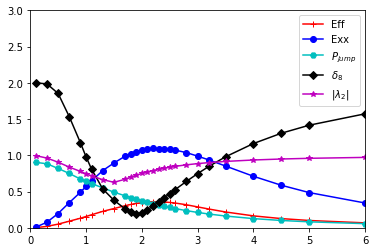

Target:  N01
Kernel:  StrawHat
Sum of row 189 > 1

























































































































































































































Sum of row 407 > 1


sigma: 0.100000 || Eff: 0.002800 || Exx: 0.011192 || Pjump: 1.049161 || Delta8: 1.999925 || EigV2: 0.994418
sigma: 0.300000 || Eff: 0.020133 || Exx: 0.079601 || Pjump: 0.890315 || Delta8: 1.985887 || EigV2: 0.960716
sigma: 0.500000 || Eff: 0.049940 || Exx: 0.194161 || Pjump: 0.802009 || Delta8: 1.861120 || EigV2: 0.906134
sigma: 0.700000 || Eff: 0.088663 || Exx: 0.337221 || Pjump: 0.725137 || Delta8: 1.558317 || EigV2: 0.841395
sigma: 0.900000 || Eff: 0.139522 || Exx: 0.514521 || Pjump: 0.668717 || Delta8: 1.111457 || EigV2: 0.766002
sigma: 1.000000 || Eff: 0.163215 || Exx: 0.593303 || Pjump: 0.632399 || Delta8: 0.921010 || EigV2: 0.734665
sigma: 1.100000 || Eff: 0.187151 || Exx: 0.670149 || Pjump: 0.597694 || Delta8: 0.759847 || EigV2: 0.705308
sigma: 1.300000 || Eff: 0.234534 || Exx: 0.813304 || Pjump: 0.532657 || Delta8: 0.504792 || EigV2: 0.653826
sigma: 1.500000 || Eff: 0.287503 || Exx: 0.956947 || Pjump: 0.478093 || Delta8: 0.310224 || EigV2: 0.644069
sigma: 1.700000 || Eff: 0.32

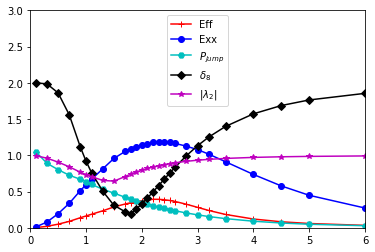

Target:  N01
Kernel:  MirrorN
sigma: 0.100000 || Eff: 0.218672 || Exx: 3.404426 || Pjump: 0.916488 || Delta8: 1.999769 || EigV2: 0.991836
sigma: 0.300000 || Eff: 1.411708 || Exx: 3.192759 || Pjump: 0.881992 || Delta8: 1.974787 || EigV2: 0.942416
sigma: 0.500000 || Eff: 1.823708 || Exx: 2.883755 || Pjump: 0.829053 || Delta8: 1.830947 || EigV2: 0.880012
sigma: 0.700000 || Eff: 1.610388 || Exx: 2.595494 || Pjump: 0.774533 || Delta8: 1.556064 || EigV2: 0.822187
sigma: 0.900000 || Eff: 1.327442 || Exx: 2.342082 || Pjump: 0.721957 || Delta8: 1.237939 || EigV2: 0.774068
sigma: 1.000000 || Eff: 1.203626 || Exx: 2.228318 || Pjump: 0.696824 || Delta8: 1.089217 || EigV2: 0.753741
sigma: 1.100000 || Eff: 1.094413 || Exx: 2.122596 || Pjump: 0.672575 || Delta8: 0.955118 || EigV2: 0.735694
sigma: 1.300000 || Eff: 0.915263 || Exx: 1.933132 || Pjump: 0.626879 || Delta8: 0.736457 || EigV2: 0.705658
sigma: 1.500000 || Eff: 0.778043 || Exx: 1.769405 || Pjump: 0.584993 || Delta8: 0.578003 || EigV2: 0.68254

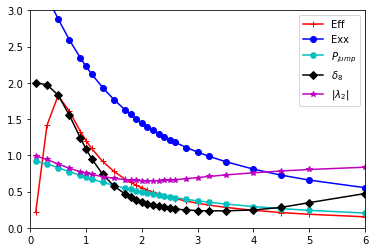

Target:  N01
Kernel:  MirrorU



































































































































































































































































































sigma: 0.100000 || Eff: 0.226597 || Exx: 3.430083 || Pjump: 0.922171 || Delta8: 1.999855 || EigV2: 0.991651
sigma: 0.300000 || Eff: 1.542993 || Exx: 3.183788 || Pjump: 0.883236 || Delta8: 1.977053 || EigV2: 0.937239
sigma: 0.500000 || Eff: 1.830058 || Exx: 2.816554 || Pjump: 0.821896 || Delta8: 1.817130 || EigV2: 0.864460
sigma: 0.700000 || Eff: 1.500554 || Exx: 2.482150 || Pjump: 0.759674 || Delta8: 1.484728 || EigV2: 0.795029
sigma: 0.900000 || Eff: 1.163780 || Exx: 2.185160 || Pjump: 0.696842 || Delta8: 1.119689 || EigV2: 0.740747
sigma: 1.000000 || Eff: 1.037456 || Exx: 2.058053 || Pjump: 0.668714 || Delta8: 0.945130 || EigV2: 0.716633
sigma: 1.100000 || Eff: 0.921646 || Exx: 1.936408 || Pjump: 0.639626 || Delta8: 0.808851 || EigV2: 0.698267
sigma: 1.300000 || Eff: 0.741933 || Exx: 1.726766 || Pjump: 0.587798 || Delta8: 0.575305 || EigV2: 0.664878
sigma: 1.500000 || Eff: 0.608885 || Exx: 1.547980 || Pjump: 0.539888 || Delta8: 0.419238 || EigV2: 0.640111
sigma: 1.700000 || Eff: 0.51

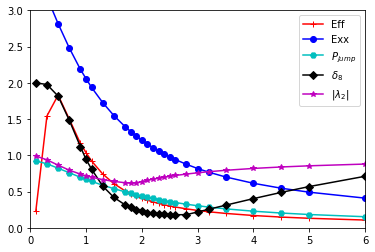

Target:  TwoNormal
Kernel:  Gaussian
sigma: 0.100000 || Eff: 0.001325 || Exx: 0.008879 || Pjump: 0.877660 || Delta8: 2.000000 || EigV2: 0.997587
sigma: 0.300000 || Eff: 0.010467 || Exx: 0.061943 || Pjump: 0.815361 || Delta8: 1.993427 || EigV2: 0.980846
sigma: 0.500000 || Eff: 0.027642 || Exx: 0.136247 || Pjump: 0.733867 || Delta8: 1.894177 || EigV2: 0.949249
sigma: 0.700000 || Eff: 0.051816 || Exx: 0.221168 || Pjump: 0.665632 || Delta8: 1.659460 || EigV2: 0.905429
sigma: 0.900000 || Eff: 0.079476 || Exx: 0.311447 || Pjump: 0.610268 || Delta8: 1.400344 || EigV2: 0.857248
sigma: 1.000000 || Eff: 0.093355 || Exx: 0.355961 || Pjump: 0.586246 || Delta8: 1.283512 || EigV2: 0.834107
sigma: 1.100000 || Eff: 0.106668 || Exx: 0.398380 || Pjump: 0.564085 || Delta8: 1.177599 || EigV2: 0.812692
sigma: 1.300000 || Eff: 0.130252 || Exx: 0.472922 || Pjump: 0.524090 || Delta8: 0.985104 || EigV2: 0.777185
sigma: 1.500000 || Eff: 0.148461 || Exx: 0.530216 || Pjump: 0.488516 || Delta8: 0.821350 || EigV2: 

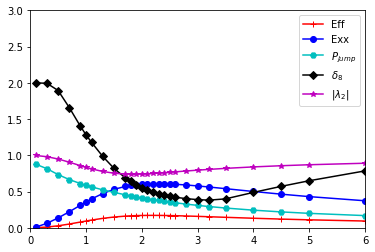

Target:  TwoNormal
Kernel:  Uniform
sigma: 0.100000 || Eff: 0.001365 || Exx: 0.009205 || Pjump: 0.895734 || Delta8: 2.000000 || EigV2: 0.997515
sigma: 0.300000 || Eff: 0.010802 || Exx: 0.067126 || Pjump: 0.809262 || Delta8: 1.995517 || EigV2: 0.980345
sigma: 0.500000 || Eff: 0.028071 || Exx: 0.149814 || Pjump: 0.712254 || Delta8: 1.888968 || EigV2: 0.948964
sigma: 0.700000 || Eff: 0.053886 || Exx: 0.241590 || Pjump: 0.632459 || Delta8: 1.613554 || EigV2: 0.902595
sigma: 0.900000 || Eff: 0.087911 || Exx: 0.344167 || Pjump: 0.572478 || Delta8: 1.341982 || EigV2: 0.843498
sigma: 1.000000 || Eff: 0.104800 || Exx: 0.393653 || Pjump: 0.546063 || Delta8: 1.228042 || EigV2: 0.815342
sigma: 1.100000 || Eff: 0.121550 || Exx: 0.443479 || Pjump: 0.522394 || Delta8: 1.112693 || EigV2: 0.788486
sigma: 1.300000 || Eff: 0.158070 || Exx: 0.555262 || Pjump: 0.483961 || Delta8: 0.869427 || EigV2: 0.735598
sigma: 1.500000 || Eff: 0.193769 || Exx: 0.664050 || Pjump: 0.450726 || Delta8: 0.673337 || EigV2: 0

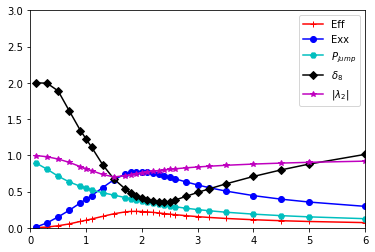

Target:  TwoNormal
Kernel:  Bactrian
sigma: 0.100000 || Eff: 0.001361 || Exx: 0.009198 || Pjump: 0.930738 || Delta8: 2.000000 || EigV2: 0.997523
sigma: 0.300000 || Eff: 0.010878 || Exx: 0.068983 || Pjump: 0.802381 || Delta8: 1.996862 || EigV2: 0.980256
sigma: 0.500000 || Eff: 0.028178 || Exx: 0.158248 || Pjump: 0.686042 || Delta8: 1.887528 || EigV2: 0.949087
sigma: 0.700000 || Eff: 0.053697 || Exx: 0.258548 || Pjump: 0.588750 || Delta8: 1.581280 || EigV2: 0.903840
sigma: 0.900000 || Eff: 0.087983 || Exx: 0.365986 || Pjump: 0.512932 || Delta8: 1.326532 || EigV2: 0.845253
sigma: 1.000000 || Eff: 0.107875 || Exx: 0.422923 || Pjump: 0.482414 || Delta8: 1.191027 || EigV2: 0.812950
sigma: 1.100000 || Eff: 0.128798 || Exx: 0.481835 || Pjump: 0.455888 || Delta8: 1.046202 || EigV2: 0.782506
sigma: 1.300000 || Eff: 0.170957 || Exx: 0.603705 || Pjump: 0.411819 || Delta8: 0.764138 || EigV2: 0.816944
sigma: 1.500000 || Eff: 0.210571 || Exx: 0.726679 || Pjump: 0.375894 || Delta8: 0.542207 || EigV2: 

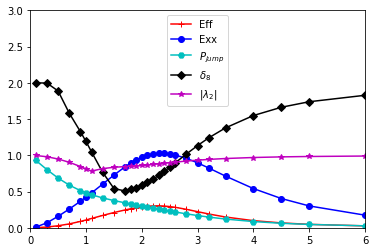

Target:  TwoNormal
Kernel:  Box
sigma: 0.100000 || Eff: 0.001271 || Exx: 0.008593 || Pjump: 0.828838 || Delta8: 2.000000 || EigV2: 0.997687
sigma: 0.300000 || Eff: 0.010392 || Exx: 0.066318 || Pjump: 0.760090 || Delta8: 1.997702 || EigV2: 0.981140
sigma: 0.500000 || Eff: 0.028938 || Exx: 0.163633 || Pjump: 0.675842 || Delta8: 1.879048 || EigV2: 0.947795
sigma: 0.700000 || Eff: 0.054005 || Exx: 0.262971 || Pjump: 0.574811 || Delta8: 1.571757 || EigV2: 0.903467
sigma: 0.900000 || Eff: 0.087710 || Exx: 0.368415 || Pjump: 0.497295 || Delta8: 1.325791 || EigV2: 0.846053
sigma: 1.000000 || Eff: 0.109747 || Exx: 0.431391 || Pjump: 0.469828 || Delta8: 1.175103 || EigV2: 0.810625
sigma: 1.100000 || Eff: 0.129020 || Exx: 0.484282 || Pjump: 0.440412 || Delta8: 1.044530 || EigV2: 0.805014
sigma: 1.300000 || Eff: 0.175665 || Exx: 0.618367 || Pjump: 0.399792 || Delta8: 0.729569 || EigV2: 0.840230
sigma: 1.500000 || Eff: 0.214986 || Exx: 0.741786 || Pjump: 0.362818 || Delta8: 0.585935 || EigV2: 0.855

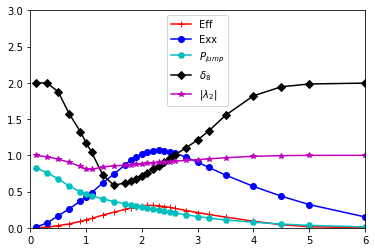

Target:  TwoNormal
Kernel:  Airplane
sigma: 0.100000 || Eff: 0.001194 || Exx: 0.008072 || Pjump: 0.876961 || Delta8: 2.000000 || EigV2: 0.997827
sigma: 0.300000 || Eff: 0.010784 || Exx: 0.068431 || Pjump: 0.801034 || Delta8: 1.996990 || EigV2: 0.980424
Sum of row 278 > 1
















Sum of row 295 > 1
sigma: 0.500000 || Eff: 0.028537 || Exx: 0.159859 || Pjump: 0.692973 || Delta8: 1.883226 || EigV2: 0.948440
Sum of row 274 > 1
























sigma: 0.700000 || Eff: 0.054933 || Exx: 0.262090 || Pjump: 0.598907 || Delta8: 1.568694 || EigV2: 0.901662
sigma: 0.900000 || Eff: 0.087036 || Exx: 0.359654 || Pjump: 0.518971 || Delta8: 1.334576 || EigV2: 0.846730
sigma: 1.000000 || Eff: 0.107740 || Exx: 0.418673 || Pjump: 0.491275 || Delta8: 1.196893 || EigV2: 0.812991
sigma: 1.100000 || Eff: 0.129593 || Exx: 0.480477 || Pjump: 0.467141 || Delta8: 1.045523 || EigV2: 0.779826
sigma: 1.300000 || Eff: 0.172247 || Exx: 0.605204 || Pjump: 0.425028 || Delta8: 0.758766 || EigV2: 0.783639
si

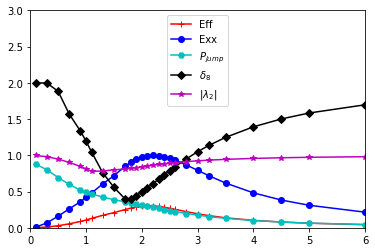

Target:  TwoNormal
Kernel:  StrawHat











































































































































sigma: 0.100000 || Eff: 0.001596 || Exx: 0.010786 || Pjump: 1.015493 || Delta8: 2.000000 || EigV2: 0.997096














Sum of row 294 > 1


sigma: 0.300000 || Eff: 0.011101 || Exx: 0.070860 || Pjump: 0.804065 || Delta8: 1.997272 || EigV2: 0.979871
sigma: 0.500000 || Eff: 0.027803 || Exx: 0.159109 || Pjump: 0.673998 || Delta8: 1.892119 || EigV2: 0.949850
sigma: 0.700000 || Eff: 0.051951 || Exx: 0.257169 || Pjump: 0.571431 || Delta8: 1.591631 || EigV2: 0.907156
Sum of row 274 > 1


























sigma: 0.900000 || Eff: 0.088797 || Exx: 0.375428 || Pjump: 0.503599 || Delta8: 1.313243 || EigV2: 0.844905
Sum of row 280 > 1

















Sum of row 298 > 1
sigma: 1.000000 || Eff: 0.108456 || Exx: 0.430803 || Pjump: 0.471336 || Delta8: 1.175934 || EigV2: 0.813998
sigma: 1.100000 || Eff: 0.129558 || Exx: 0.489455 || Pjump: 0.444363 || Delta8: 1.035443 || EigV2: 0.803022
sigma: 1.300000 || Eff: 0.171045 || Exx: 0.611281 || Pjump: 0.400221 || Delta8: 0.740768 || EigV2: 0.837564
sigma: 1.500000 || Eff: 0.213057 || Exx: 0.751965 || Pjump: 0.368417 || Delta8: 0.519043 || EigV2: 0.842682
sigma: 1.700000 || Eff: 0.249370 || 

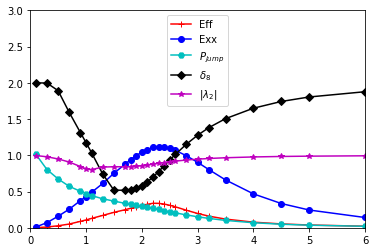

Target:  TwoNormal
Kernel:  MirrorN
Sum of row 250 > 1
Sum of row 251 > 1
sigma: 0.100000 || Eff: 0.307582 || Exx: 2.873499 || Pjump: 0.543316 || Delta8: 2.000000 || EigV2: 0.989609
sigma: 0.300000 || Eff: 1.025449 || Exx: 2.609518 || Pjump: 0.529403 || Delta8: 1.991807 || EigV2: 0.917029
sigma: 0.500000 || Eff: 1.000903 || Exx: 2.311160 || Pjump: 0.512391 || Delta8: 1.865051 || EigV2: 0.822637
sigma: 0.700000 || Eff: 0.847069 || Exx: 2.045942 || Pjump: 0.498636 || Delta8: 1.564800 || EigV2: 0.758980
sigma: 0.900000 || Eff: 0.715284 || Exx: 1.823233 || Pjump: 0.487295 || Delta8: 1.223228 || EigV2: 0.746740
sigma: 1.000000 || Eff: 0.659234 || Exx: 1.725866 || Pjump: 0.481197 || Delta8: 1.070476 || EigV2: 0.742588
sigma: 1.100000 || Eff: 0.608847 || Exx: 1.636529 || Pjump: 0.474377 || Delta8: 0.936242 || EigV2: 0.738857
sigma: 1.300000 || Eff: 0.523074 || Exx: 1.478719 || Pjump: 0.458350 || Delta8: 0.723240 || EigV2: 0.734903
sigma: 1.500000 || Eff: 0.454295 || Exx: 1.344384 || Pjump: 0.

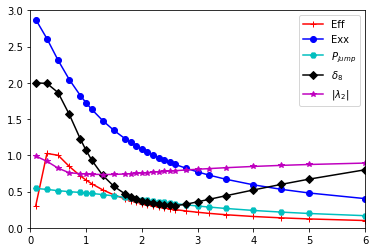

Target:  TwoNormal
Kernel:  MirrorU
Sum of row 200 > 1


































































































sigma: 0.100000 || Eff: 0.311333 || Exx: 2.885695 || Pjump: 0.546067 || Delta8: 2.000000 || EigV2: 0.989420


























































sigma: 0.300000 || Eff: 1.022198 || Exx: 2.589128 || Pjump: 0.530580 || Delta8: 1.994076 || EigV2: 0.911626
sigma: 0.500000 || Eff: 0.930991 || Exx: 2.240752 || Pjump: 0.510383 || Delta8: 1.851463 || EigV2: 0.803083
sigma: 0.700000 || Eff: 0.725374 || Exx: 1.925811 || Pjump: 0.490656 || Delta8: 1.477522 || EigV2: 0.783892
sigma: 0.900000 || Eff: 0.613345 || Exx: 1.667024 || Pjump: 0.479273 || Delta8: 1.090898 || EigV2: 0.774292
sigma: 1.000000 || Eff: 0.572735 || Exx: 1.563251 || Pjump: 0.478222 || Delta8: 0.917492 || EigV2: 0.764344
sigma: 1.100000 || Eff: 0.528187 || Exx: 1.469555 || Pjump: 0.477219 || Delta8: 0.786162 || EigV2: 0.753656
sigma: 1.300000 || Eff: 0.434623 || Exx: 1.303261 || Pjump: 0.468423 || Delta8: 0.568742 || EigV2: 0.730208
sigma: 1.500000 || Eff: 0.360109 || Exx: 1.158218 || Pjump: 0.446391 || Delta8: 0.437631 || EigV2: 0.706454
sigma: 1.700000 || Eff: 0.306623 || Exx: 1.034772 || Pjump: 0.416920 || Delta8: 0.370778 || EigV2: 0.718944
sigma: 1.800000 |

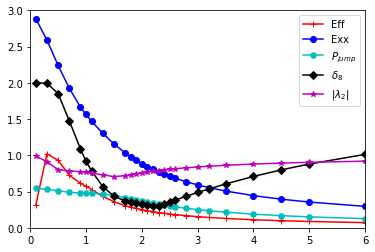

Target:  TwoT4
Kernel:  Gaussian
sigma: 0.100000 || Eff: 0.002233 || Exx: 0.009149 || Pjump: 0.891233 || Delta8: 1.998736 || EigV2: 0.996129
sigma: 0.300000 || Eff: 0.017086 || Exx: 0.068188 || Pjump: 0.853338 || Delta8: 1.984586 || EigV2: 0.971703
sigma: 0.500000 || Eff: 0.040623 || Exx: 0.156842 || Pjump: 0.788042 || Delta8: 1.910876 || EigV2: 0.936134
sigma: 0.700000 || Eff: 0.068445 || Exx: 0.256243 || Pjump: 0.726697 || Delta8: 1.732919 || EigV2: 0.897639
sigma: 0.900000 || Eff: 0.097299 || Exx: 0.353516 || Pjump: 0.671536 || Delta8: 1.485881 || EigV2: 0.860456
sigma: 1.000000 || Eff: 0.111315 || Exx: 0.398253 || Pjump: 0.646091 || Delta8: 1.355900 || EigV2: 0.843008
sigma: 1.100000 || Eff: 0.124731 || Exx: 0.439328 || Pjump: 0.621939 || Delta8: 1.229449 || EigV2: 0.826479
sigma: 1.300000 || Eff: 0.149075 || Exx: 0.509146 || Pjump: 0.577218 || Delta8: 1.000558 || EigV2: 0.796329
sigma: 1.500000 || Eff: 0.169364 || Exx: 0.562459 || Pjump: 0.536895 || Delta8: 0.813193 || EigV2: 0.77

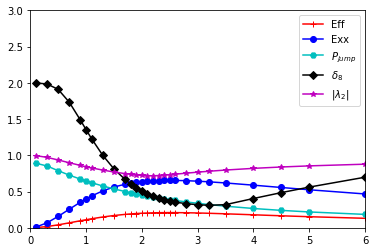

Target:  TwoT4
Kernel:  Uniform
sigma: 0.100000 || Eff: 0.002299 || Exx: 0.009430 || Pjump: 0.910650 || Delta8: 1.998909 || EigV2: 0.996004
sigma: 0.300000 || Eff: 0.018172 || Exx: 0.072810 || Pjump: 0.851834 || Delta8: 1.986382 || EigV2: 0.969720
sigma: 0.500000 || Eff: 0.044452 || Exx: 0.171943 || Pjump: 0.774931 || Delta8: 1.910008 || EigV2: 0.929710
sigma: 0.700000 || Eff: 0.077002 || Exx: 0.286778 || Pjump: 0.704185 || Delta8: 1.702520 || EigV2: 0.884900
sigma: 0.900000 || Eff: 0.112592 || Exx: 0.405694 || Pjump: 0.642159 || Delta8: 1.407082 || EigV2: 0.840632
sigma: 1.000000 || Eff: 0.129174 || Exx: 0.459249 || Pjump: 0.612544 || Delta8: 1.265380 || EigV2: 0.821489
sigma: 1.100000 || Eff: 0.145578 || Exx: 0.510813 || Pjump: 0.585185 || Delta8: 1.128707 || EigV2: 0.803322
sigma: 1.300000 || Eff: 0.179601 || Exx: 0.610937 || Pjump: 0.536970 || Delta8: 0.863008 || EigV2: 0.767015
sigma: 1.500000 || Eff: 0.208149 || Exx: 0.684913 || Pjump: 0.492056 || Delta8: 0.656521 || EigV2: 0.736

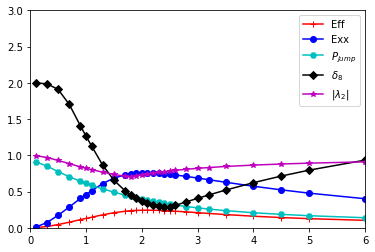

Target:  TwoT4
Kernel:  Bactrian
sigma: 0.100000 || Eff: 0.002289 || Exx: 0.009392 || Pjump: 0.946987 || Delta8: 1.999014 || EigV2: 0.996015
sigma: 0.300000 || Eff: 0.018423 || Exx: 0.073955 || Pjump: 0.849277 || Delta8: 1.987688 || EigV2: 0.969142
sigma: 0.500000 || Eff: 0.046031 || Exx: 0.178514 || Pjump: 0.757074 || Delta8: 1.911480 || EigV2: 0.926672
sigma: 0.700000 || Eff: 0.081508 || Exx: 0.303646 || Pjump: 0.673863 || Delta8: 1.683469 || EigV2: 0.877252
sigma: 0.900000 || Eff: 0.121999 || Exx: 0.436739 || Pjump: 0.600667 || Delta8: 1.350377 || EigV2: 0.826602
sigma: 1.000000 || Eff: 0.143301 || Exx: 0.503634 || Pjump: 0.567685 || Delta8: 1.176606 || EigV2: 0.801988
sigma: 1.100000 || Eff: 0.164882 || Exx: 0.569569 || Pjump: 0.536880 || Delta8: 1.009429 || EigV2: 0.778265
sigma: 1.300000 || Eff: 0.207673 || Exx: 0.694606 || Pjump: 0.480789 || Delta8: 0.717958 || EigV2: 0.734396
sigma: 1.500000 || Eff: 0.247991 || Exx: 0.803369 || Pjump: 0.430360 || Delta8: 0.500798 || EigV2: 0.74

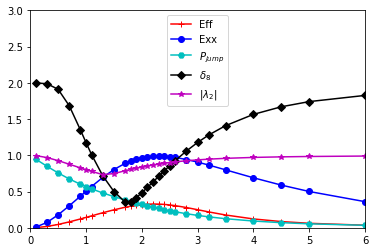

Target:  TwoT4
Kernel:  Box
sigma: 0.100000 || Eff: 0.002136 || Exx: 0.008768 || Pjump: 0.844009 || Delta8: 1.999083 || EigV2: 0.996279
sigma: 0.300000 || Eff: 0.017640 || Exx: 0.070912 || Pjump: 0.805626 || Delta8: 1.988843 || EigV2: 0.970397
sigma: 0.500000 || Eff: 0.047594 || Exx: 0.184434 || Pjump: 0.749073 || Delta8: 1.906398 || EigV2: 0.924241
sigma: 0.700000 || Eff: 0.083027 || Exx: 0.309092 || Pjump: 0.661980 || Delta8: 1.674561 || EigV2: 0.874988
sigma: 0.900000 || Eff: 0.123461 || Exx: 0.441525 || Pjump: 0.586958 || Delta8: 1.341877 || EigV2: 0.824512
sigma: 1.000000 || Eff: 0.147210 || Exx: 0.515785 || Pjump: 0.557141 || Delta8: 1.149591 || EigV2: 0.797094
sigma: 1.100000 || Eff: 0.166406 || Exx: 0.574386 || Pjump: 0.522348 || Delta8: 1.002383 || EigV2: 0.776263
sigma: 1.300000 || Eff: 0.215067 || Exx: 0.716713 || Pjump: 0.470487 || Delta8: 0.681160 || EigV2: 0.729069
sigma: 1.500000 || Eff: 0.256386 || Exx: 0.828850 || Pjump: 0.418805 || Delta8: 0.471533 || EigV2: 0.767818


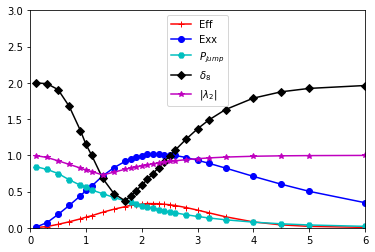

Target:  TwoT4
Kernel:  Airplane
sigma: 0.100000 || Eff: 0.002006 || Exx: 0.008236 || Pjump: 0.891553 || Delta8: 1.999101 || EigV2: 0.996504
sigma: 0.300000 || Eff: 0.018284 || Exx: 0.073414 || Pjump: 0.847110 || Delta8: 1.987825 || EigV2: 0.969382
sigma: 0.500000 || Eff: 0.046672 || Exx: 0.180870 || Pjump: 0.763688 || Delta8: 1.908495 || EigV2: 0.925783
sigma: 0.700000 || Eff: 0.083251 || Exx: 0.309471 || Pjump: 0.683503 || Delta8: 1.669798 || EigV2: 0.875085
sigma: 0.900000 || Eff: 0.120304 || Exx: 0.431092 || Pjump: 0.603545 || Delta8: 1.363325 || EigV2: 0.829066
sigma: 1.000000 || Eff: 0.141895 || Exx: 0.499237 || Pjump: 0.572668 || Delta8: 1.186114 || EigV2: 0.804104
sigma: 1.100000 || Eff: 0.163785 || Exx: 0.566609 || Pjump: 0.543602 || Delta8: 1.016024 || EigV2: 0.780082
sigma: 1.300000 || Eff: 0.207446 || Exx: 0.695099 || Pjump: 0.490171 || Delta8: 0.718949 || EigV2: 0.735696
sigma: 1.500000 || Eff: 0.243408 || Exx: 0.791994 || Pjump: 0.438303 || Delta8: 0.521661 || EigV2: 0.73

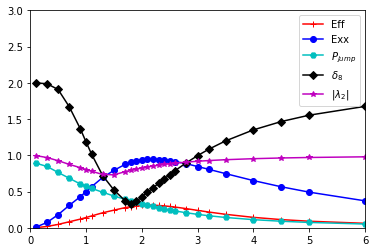

Target:  TwoT4
Kernel:  StrawHat
























































































































Sum of row 128 > 1
Sum of row 129 > 1
Sum of row 130 > 1























































































































































Sum of row 453 > 1
Sum of row 454 > 1
Sum of row 455 > 1










































































































































sigma: 0.100000 || Eff: 0.002682 || Exx: 0.011011 || Pjump: 1.034161 || Delta8: 1.999012 || EigV2: 0.995332










sigma: 0.300000 || Eff: 0.018866 || Exx: 0.075764 || Pjump: 0.852398 || Delta8: 1.987851 || EigV2: 0.968378
sigma: 0.500000 || Eff: 0.046039 || Exx: 0.178839 || Pjump: 0.746010 || Delta8: 1.914256 || EigV2: 0.926509
sigma: 0.700000 || Eff: 0.080905 || Exx: 0.302077 || Pjump: 0.657735 || Delta8: 1.692407 || EigV2: 0.877783
sigma: 0.900000 || Eff: 0.126673 || Exx: 0.451960 || Pjump: 0.595061 || Delta8: 1.318275 || EigV2: 0.820453
sigma: 1.000000 || Eff: 0.148039 || Exx: 0.518554 || Pjump: 0.559400 || Delta8: 1.144302 || EigV2: 0.796015
sigma: 1.100000 || Eff: 0.169640 || Exx: 0.584467 || Pjump: 0.526701 || Delta8: 0.977793 || EigV2: 0.772513
sigma: 1.300000 || Eff: 0.212611 || Exx: 0.711723 || Pjump: 0.468624 || Delta8: 0.694608 || EigV2: 0.729595
sigma: 1.500000 || Eff: 0.261216 || Exx: 0.

sigma: 7.000000 || Eff: 0.018182 || Exx: 0.232166 || Pjump: 0.017618 || Delta8: 1.917135 || EigV2: 0.995829
sigma: 8.000000 || Eff: 0.012111 || Exx: 0.161268 || Pjump: 0.011887 || Delta8: 1.938693 || EigV2: 0.997206


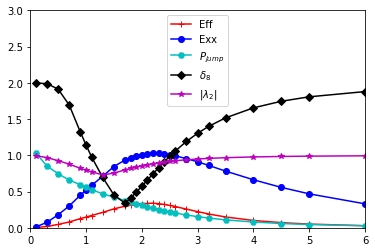

Target:  TwoT4
Kernel:  MirrorN
Sum of row 337 > 1
Sum of row 338 > 1
Sum of row 339 > 1
Sum of row 340 > 1
Sum of row 341 > 1
Sum of row 342 > 1
Sum of row 343 > 1
Sum of row 344 > 1
Sum of row 345 > 1
Sum of row 346 > 1
Sum of row 348 > 1
Sum of row 350 > 1
Sum of row 352 > 1
Sum of row 353 > 1
Sum of row 354 > 1
Sum of row 515 > 1
Sum of row 517 > 1
Sum of row 518 > 1
Sum of row 523 > 1
Sum of row 524 > 1
Sum of row 525 > 1
Sum of row 526 > 1
Sum of row 527 > 1
Sum of row 528 > 1
Sum of row 529 > 1
Sum of row 532 > 1
Sum of row 535 > 1
Sum of row 537 > 1
Sum of row 538 > 1
Sum of row 539 > 1
Sum of row 540 > 1
Sum of row 541 > 1
Sum of row 543 > 1
Sum of row 545 > 1
Sum of row 546 > 1
Sum of row 547 > 1
Sum of row 548 > 1
Sum of row 549 > 1
Sum of row 550 > 1
Sum of row 551 > 1
Sum of row 552 > 1
Sum of row 557 > 1
Sum of row 558 > 1
sigma: 0.100000 || Eff: 0.016467 || Exx: 2.098131 || Pjump: 0.566836 || Delta8: 1.997510 || EigV2: 0.997330
sigma: 0.300000 || Eff: 0.162224 || Exx: 2.

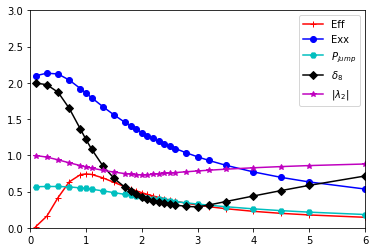

Target:  TwoT4
Kernel:  MirrorU



































































































































































































































































































sigma: 0.100000 || Eff: 0.016689 || Exx: 2.110743 || Pjump: 0.569934 || Delta8: 1.997820 || EigV2: 0.997304


































































































sigma: 0.300000 || Eff: 0.166531 || Exx: 2.153119 || Pjump: 0.573834 || Delta8: 1.977523 || EigV2: 0.975107
























Sum of row 355 > 1
Sum of row 510 > 1
Sum of row 511 > 1
Sum of row 512 > 1
Sum of row 513 > 1
Sum of row 514 > 1
Sum of row 515 > 1
Sum of row 516 > 1
Sum of row 517 > 1
Sum of row 518 > 1
Sum of row 519 > 1





































sigma: 0.500000 || Eff: 0.484902 || Exx: 2.181166 || Pjump: 0.577236 || Delta8: 1.867987 || EigV2: 0.931675
sigma: 0.700000 || Eff: 0.729480 || Exx: 2.063348 || Pjump: 0.569774 || Delta8: 1.603011 || EigV2: 0.884243
sigma: 0.900000 || Eff: 0.800728 || Exx: 1.893449 || Pjump: 0.555094 || Delta8: 1.277552 || EigV2: 0.841061
sigma: 1.000000 || Eff: 0.802055 || Exx: 1.816210 || Pjump: 0.550589 || Delta8: 1.108373 || EigV2: 0.819375
sigma: 1.100000 || Eff: 0.761041 || Exx: 1.730971 || Pjump: 0.538872 || Delta8: 0.968577 || EigV2: 0.801319
sigma: 1.300000 

sigma: 1.500000 || Eff: 0.551764 || Exx: 1.432538 || Pjump: 0.476914 || Delta8: 0.534927 || EigV2: 0.737654
sigma: 1.700000 || Eff: 0.470413 || Exx: 1.306421 || Pjump: 0.441839 || Delta8: 0.408969 || EigV2: 0.718154
sigma: 1.800000 || Eff: 0.436742 || Exx: 1.249002 || Pjump: 0.424562 || Delta8: 0.363565 || EigV2: 0.716533
sigma: 1.900000 || Eff: 0.407242 || Exx: 1.196086 || Pjump: 0.408250 || Delta8: 0.324553 || EigV2: 0.723082
sigma: 2.000000 || Eff: 0.380980 || Exx: 1.145905 || Pjump: 0.392242 || Delta8: 0.299120 || EigV2: 0.734263
sigma: 2.100000 || Eff: 0.357774 || Exx: 1.099918 || Pjump: 0.377392 || Delta8: 0.274733 || EigV2: 0.745637
sigma: 2.200000 || Eff: 0.336981 || Exx: 1.056266 || Pjump: 0.362995 || Delta8: 0.262206 || EigV2: 0.756560
sigma: 2.300000 || Eff: 0.318403 || Exx: 1.016037 || Pjump: 0.349629 || Delta8: 0.250962 || EigV2: 0.766700
sigma: 2.400000 || Eff: 0.301639 || Exx: 0.977939 || Pjump: 0.336821 || Delta8: 0.261010 || EigV2: 0.776154
sigma: 2.500000 || Eff: 0.28

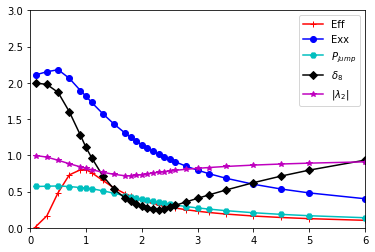

In [266]:
# Target: N01, TwoNormal, TwoT4
sigmaset = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5, 1.7,
                    1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8,
                    3.0, 3.2, 3.5, 4, 4.5, 5, 6, 7, 8]

kernelset = ['Gaussian', 'Uniform', 'Bactrian', 'Box', 'Airplane', 'StrawHat', 'MirrorN', 'MirrorU']
targetset = ['N01','TwoNormal','TwoT4']

for target in targetset:
    for kernel in kernelset:
        effset = []
        Exxset = []
        Pjumpset = []
        Deltaset = []
        Eigset = []
        print('Target: ', target)
        print('Kernel: ', kernel)
        for sigma in sigmaset:
            K = 600
            if (target == 'Gamma'):
                (xL,xU) = (0,10)
            elif (target == 'Uniform'):
                (xL,xU) = (-np.sqrt(3),np.sqrt(3))
            else:
                (xL,xU) = (-4.95,5)
        #     K = 1200
        #     (xL,xU) = (-10,10)
            dx = (xU-xL)/K
            x = np.zeros(K)
            pi = x.copy()
            for i in range(K):
                x[i] = xL + dx * (i+0.5)
                pi[i] = logtargetpdf(x[i], target)

            mid = pi[int(K/2)]
            for i in range(K):
                pi[i] = np.exp(pi[i]-mid)
            pi = pi/sum(pi)

            p = np.zeros(K*K).reshape(K,K)
            if (target == 'Uniform'):
                p = uniform_target()
            else:
                for i in range(K):
                    lnLold = logtargetpdf(x[i], target)
                    for j in range(K):
                        if(i==j):
                            continue
                        p[i,j] = proposal(x[i], x[j], sigma, kernel) * dx

                        if ((target=='Gamma')& ('Mirror' not in kernel)):
                            p[i,j] += proposal(x[i],-x[j],sigma,kernel) * dx
                        if ('Mirror' not in kernel):
                            proposal_ratio = 1
                        elif(target == 'Gamma'):
                            proposal_ratio = x[j]/x[i]
                        elif(target == 'Uniform'):
                            proposal_ratio = ((b-x[j])*(x[j]-a)) / ((b-x[i]) * (x[i]-a))    

                        lna = logtargetpdf(x[j], target) - lnLold + np.log(proposal_ratio)
                        if (lna < 0):
                            p[i,j] = p[i,j] * np.exp(lna)
                    y = sum(p[i,])
                    if (y<1e-8):
                        print("Warning: state %d (x = %f) is absoring.\n"%(i+1, x[i]))
                    if (y>1.001):
                        print("Warning: P[%d,%d] = %f < 0.  Row %d rescaled.\n"%(i+1, i+1, 1-y, i+1));
                    elif (y>1):
                        y = 1
                        print('Sum of row %d > 1' % i)
                    p[i,i] = 1-y
        #   Efficiency
            A = np.zeros(K*K).reshape(K,K)
            for i in range(K):
                A[:,i] = pi[i]
            I = np.eye(K)
            Z = np.linalg.inv(I - p + A)
            T = 2*Z - I - A
            f = x.reshape(K,1).copy()
            r = np.dot(T,f)
            B = np.diag(pi)
            fTB = np.dot(f.T,B)
            Eff = np.dot(fTB,r)
            Eff = 1/Eff

        #  Exx
            Exx = 0
            for i in range(K):
                Exx += 2*pi[i]* np.sum(p[i,:i] * np.square(x[:i]-x[i]))

        #  Pjump
            Pjump = np.sum(pi * (1-np.diag(p)))

        #  Delta    
            p8 = np.linalg.matrix_power(p,8)
            Delta = np.max(np.sum(abs(p8 - pi),axis=1))

        #  EigValue
            eigarray = (np.linalg.eig(p)[0]).tolist()
#             eigarray.sort(reverse=True)
            eigvalue = sorted(eigarray, key=lambda x: x.real,reverse=True)[1].real

            effset.append(np.asscalar(Eff))
            Exxset.append(np.asscalar(Exx))
            Pjumpset.append(np.asscalar(Pjump))
            Deltaset.append(np.asscalar(Delta))
            Eigset.append(eigvalue)
            print('sigma: %f || Eff: %f || Exx: %f || Pjump: %f || Delta8: %f || EigV2: %f'%(sigma,Eff,Exx,Pjump,Delta,eigvalue))

        plt.plot(sigmaset,effset,marker='+',color='red',label='Eff')
        plt.plot(sigmaset,Exxset,marker='o',color='Blue',label='Exx')
        plt.plot(sigmaset,Pjumpset,marker='H',color='c',label='$P_{jump}$')
        plt.plot(sigmaset,Deltaset,marker='D',color='Black',label='$\delta_8$')
        plt.plot(sigmaset,Eigset,marker='*',color='m',label='|$\lambda_2$|')
        plt.ylim(0, 3)
        plt.xlim(0, 6)
        plt.legend()
        filename = 'McmcFiugre/Target_' + target + ' Kernel_'+ kernel+'.eps'
        plt.savefig(filename, format='eps', dpi=1000)
        plt.show()